In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras

In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [3]:
def shape(x,y,z,a):
  return x.shape,y.shape,z.shape,a.shape

In [4]:
shape(x_train,y_train,x_test,y_test)

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [5]:
def dimension(a):
  a = a.ndim
  return a

In [6]:
dimension(x_train)

4

In [7]:
def imgshow(x,n,y):
  plt.matshow(x[n])
  return y[n]

array([6], dtype=uint8)

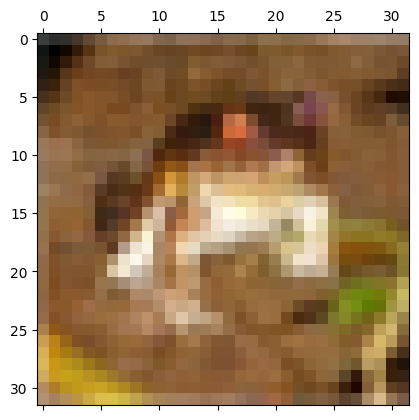

In [8]:
imgshow(x_train,0,y_train)

In [9]:
def unique(n):
  return np.unique(n)

In [10]:
x_train_norm = x_train/255
x_test_norm = x_test/255

In [11]:
x_train_flat = x_train_norm.reshape(len(x_train),32*32*3)
x_test_flat = x_test_norm.reshape(len(x_test),32*32*3)

In [12]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape = (3072,),activation = 'relu'),
    keras.layers.Dense(50 , activation = 'relu'),
    keras.layers.Dense(50 , activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])

In [13]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
)

In [14]:
model.fit(x_train_flat,y_train,epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 13s 7ms/step - loss: 1.8740 - accuracy: 0.3196
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7086 - accuracy: 0.3835
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6359 - accuracy: 0.4112
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5874 - accuracy: 0.4278
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5534 - accuracy: 0.4433
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5305 - accuracy: 0.4519
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5149 - accuracy: 0.4574
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4907 - accuracy: 0.4694
Epoch 9/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4762 - accuracy: 0.4712
Epoch 10/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.

In [15]:
model.evaluate(x_train_flat,y_train)

1563/1563 [==============================] - 9s 5ms/step - loss: 1.4177 - accuracy: 0.4963


[1.4177132844924927, 0.4962800145149231]

In [29]:
pred = model.predict(x_test_flat)

313/313 [==============================] - 2s 5ms/step


array([3], dtype=uint8)

In [17]:
np.argmax(pred[7])

6

array([6], dtype=uint8)

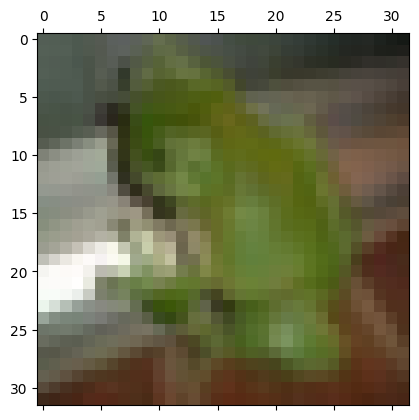

In [18]:
imgshow(x_test,7,y_test)

array([4], dtype=uint8)

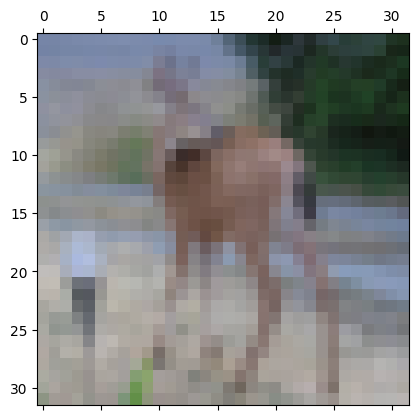

In [22]:
imgshow(x_test,100,y_test)

In [23]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [25]:
tf.test.is_built_with_cuda()

True

In [30]:
def get_model():
  model = keras.Sequential([
    keras.layers.Dense(100,input_shape = (3072,),activation = 'relu'),
    keras.layers.Dense(50 , activation = 'relu'),
    keras.layers.Dense(50 , activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])
  model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
)
  return model

In [33]:
%%timeit -n1 -r1
with tf.device('/cpu:0'):
  cpu_model = get_model()
  cpu_model.fit(x_train_flat,y_train,epochs = 1)

1563/1563 [==============================] - 11s 6ms/step - loss: 1.8818 - accuracy: 0.3193
13.6 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [35]:
%%timeit -n1 -r1
with tf.device('/gpu:0'):
  gpu_model = get_model()
  gpu_model.fit(x_train_flat,y_train,epochs = 1)

1563/1563 [==============================] - 10s 6ms/step - loss: 1.8806 - accuracy: 0.3161
11.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
